# Tutorial - Chapter 4 Classification (Mushrooom)

## Classification
For this project, we will explore the mushroom dataset from UCI Machine Learning Repo.

https://archive.ics.uci.edu/dataset/73/mushroom

The classification of mushrooms as edible or poisonous is important to public health, culinary arts, and biological research. We will try to classify these mushrooms as poisonous or edible using 

- **Logistic regression**
- **Linear discriminant analysis (LQA)**
- **Quadratic discriminant analysis (QDA)**

https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

## 1. Import libraries

In [39]:
import pandas as pd  # Pandas for data analysis
import numpy as np   # NumPy for numerical operations

import matplotlib.pyplot as plt  # Matplotlib for basic data visualization
import seaborn as sns            # Seaborn for statistical data visualization
import statsmodels.api as sm     # Statsmodels for statistical modeling

from sklearn.preprocessing import LabelEncoder  # Scikit-learn for machine learning tasks
from sklearn.model_selection import train_test_split, cross_val_score  # Data splitting and cross-validation
from sklearn.metrics import roc_curve, auc, confusion_matrix  # Evaluation metrics for classification models

%matplotlib inline

## 2. Loading the dataset

In [77]:
DATAPATH = 'data/mushrooms.csv' # Specify the path to the dataset file
data = pd.read_csv(DATAPATH)

# Display the first few rows of the dataset to get an overview
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


#### Visualizing the count of edible and poisonous mushrooms

In [78]:
# check to see counts for each class
counts = data['class'].value_counts()
print(counts)

class
e    4208
p    3916
Name: count, dtype: int64


In [4]:
# checking ratio of class 'e' vs 'p'
total_counts = 4208 + 3916
print((4208/total_counts)*100) # class 0 = 'e'
print((3916/total_counts)*100) # class 1 = 'p'

51.7971442639094
48.20285573609059


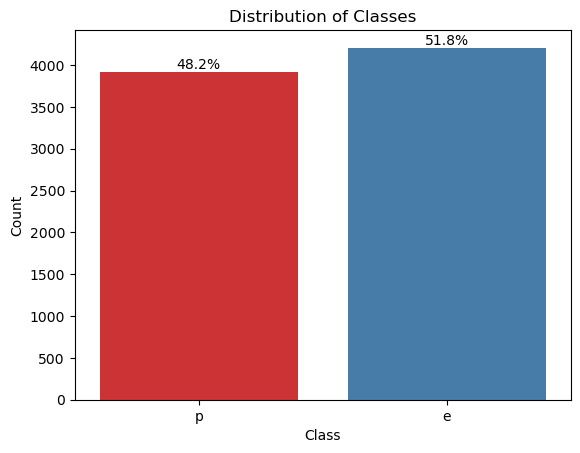

<Figure size 800x600 with 0 Axes>

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

#target column class: Indicates whether the mushroom is edible ('e') or poisonous ('p')
x = data['class']

# Create a count plot using Seaborn
ax = sns.countplot(x=x, data=data, palette='Set1')

# Add labels and title to the plot
ax.set(xlabel='Class', ylabel='Count', title='Distribution of Classes')

# Add percentage on top of each bar
total = len(x)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x_position = p.get_x() + p.get_width() / 2
    y_position = p.get_height()
    ax.annotate(percentage, (x_position, y_position), ha='center', va='bottom')

plt.figure(figsize=(8, 6))

# Show the plot
plt.show()

For now, let’s see if our data set is unbalanced. An unbalanced data set is when one class is much more present than the other.
In our data, we want to see if there is an equal number of poisonous and edible mushrooms in the data set. **The dataset is balanced.**

In [80]:
def plot_data(hue, data):
    for i, col in enumerate(data.columns):
        plt.figure(i)
        ax = sns.countplot(x=data[col], hue=hue, data=data)

In [81]:
def plot_data(hue, data):
    """
    Create count plots for each column in the given dataset, segmented by the specified 'hue' variable.

    Parameters:
    - hue: Variable used for color segmentation in the count plots.
    - data: The dataset on which the function operates.
    """
    # Loop over columns in the dataset
    for i, col in enumerate(data.columns):
        # Create a new figure for each column
        plt.figure(i)
        
        # Create a count plot for the current column, segmented by 'hue'
        ax = sns.countplot(x=data[col], hue=hue, data=data)

/var/folders/9m/wyctr7ld6vg0x1kjlmlh42hh0000gn/T/ipykernel_21676/2912621643.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(i)


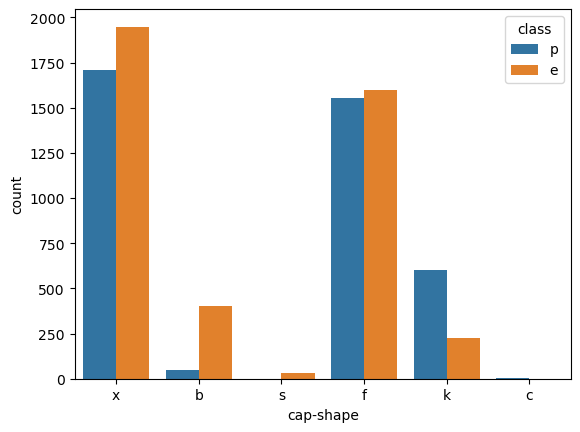

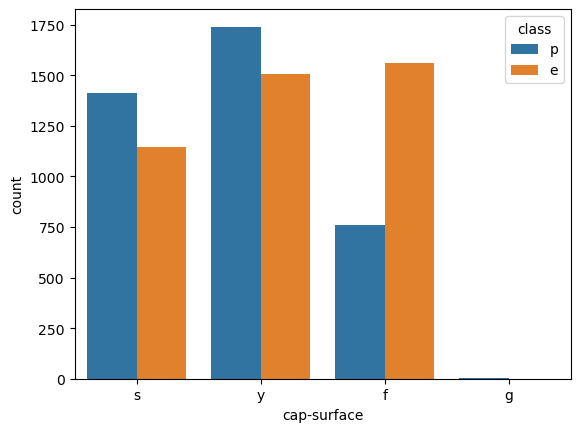

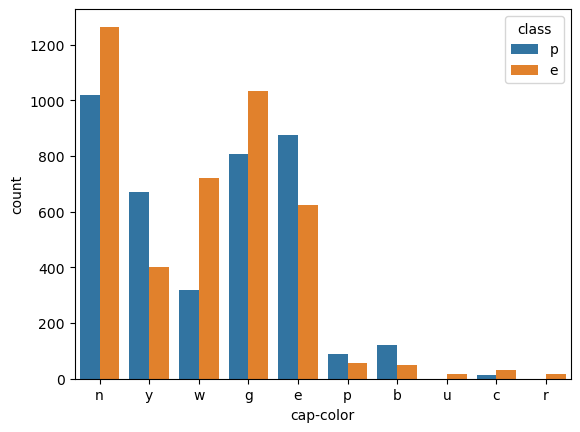

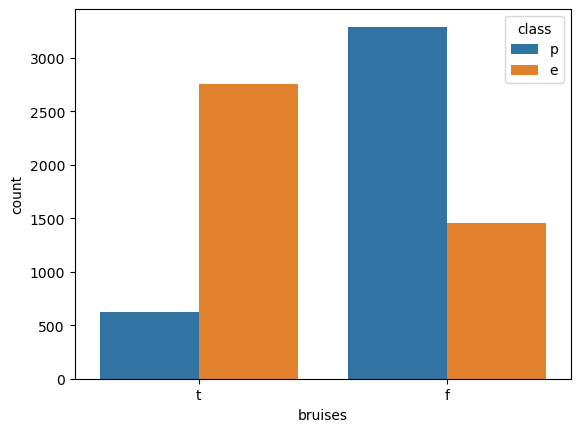

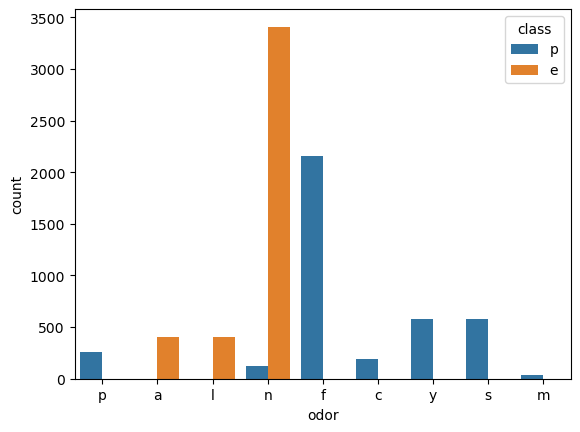

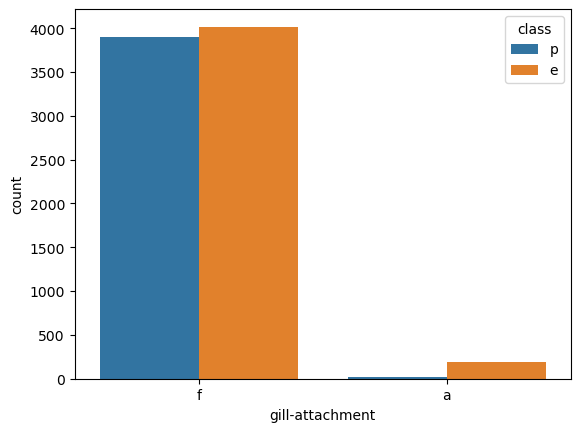

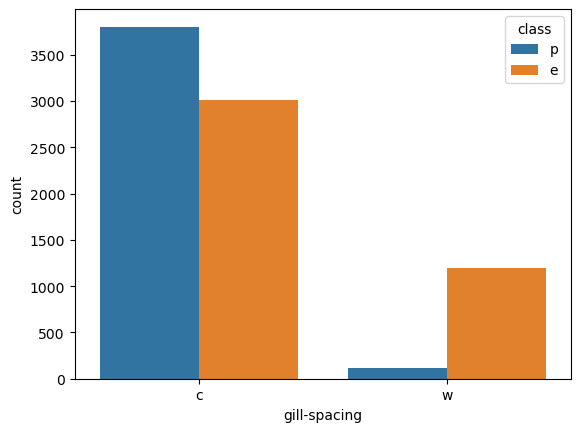

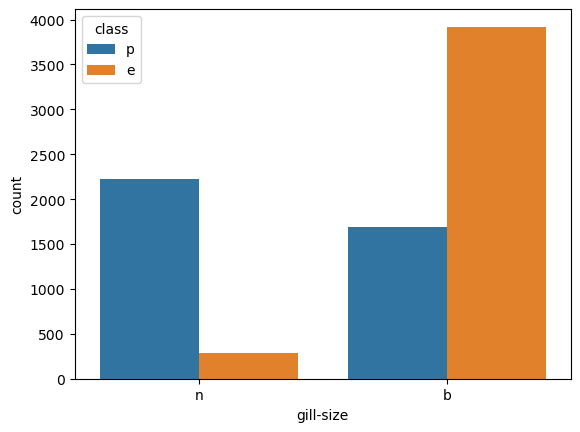

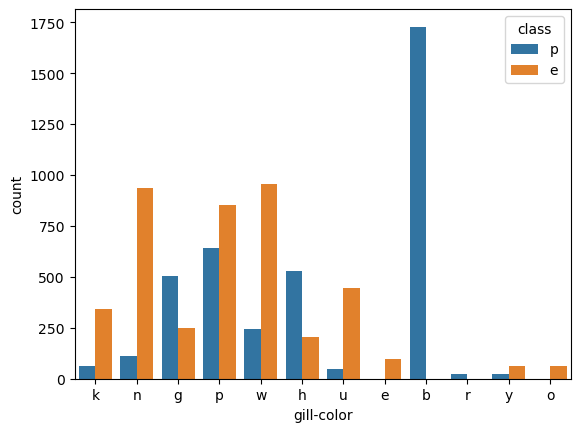

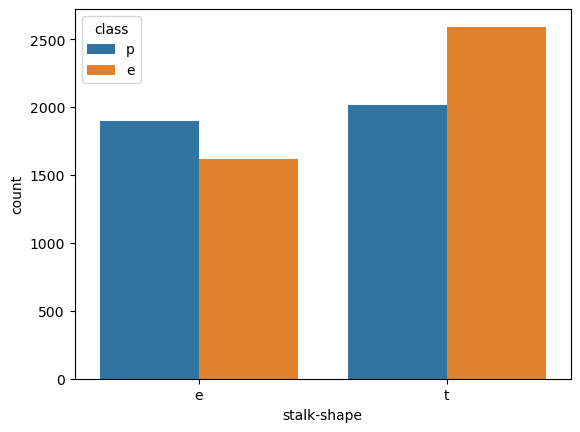

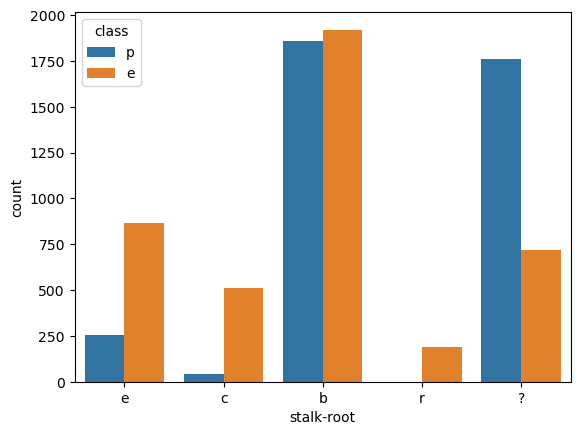

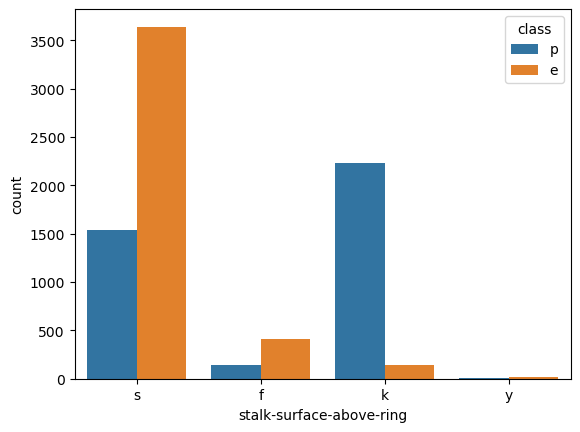

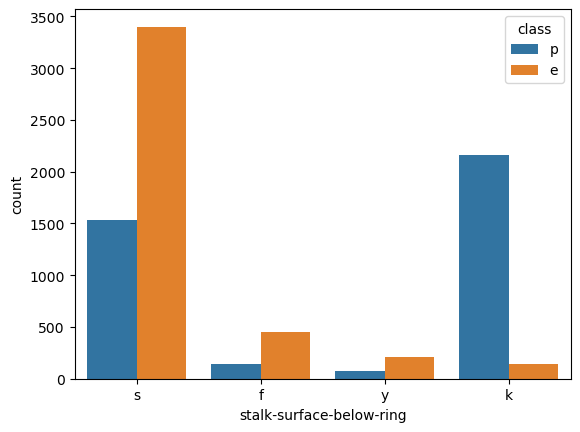

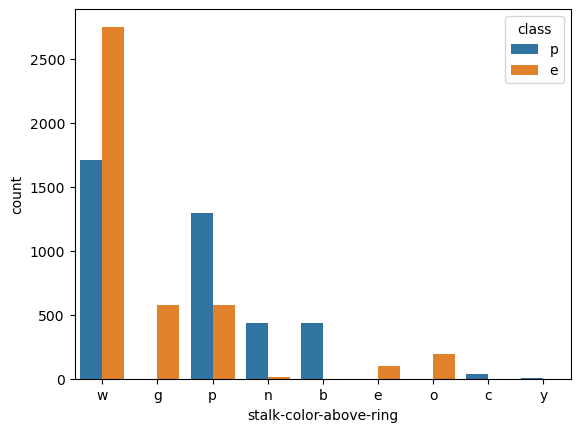

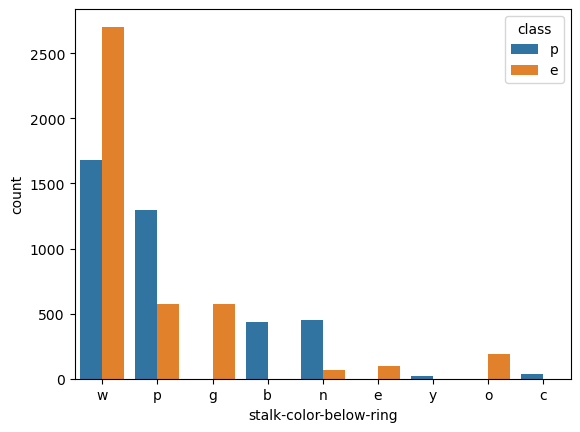

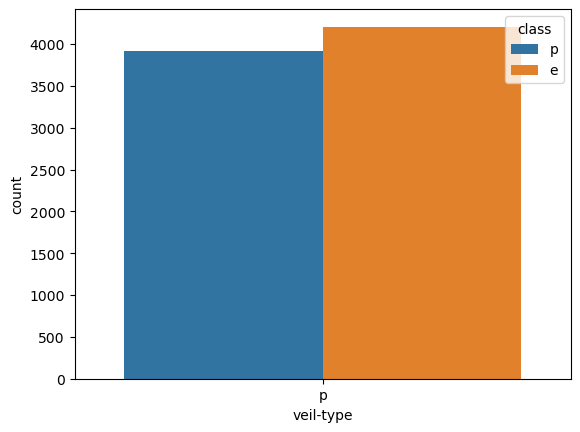

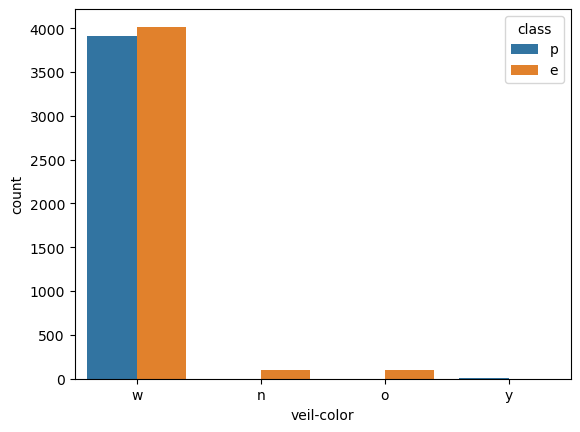

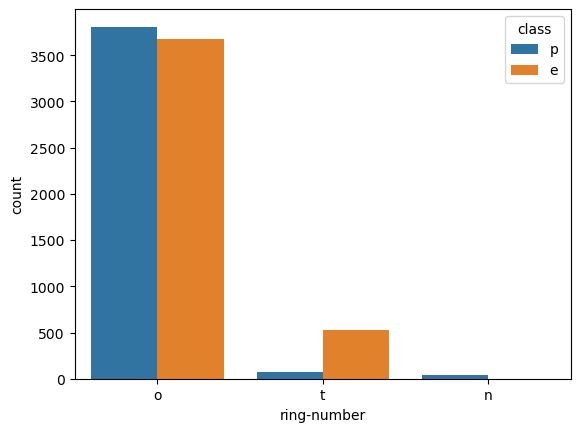

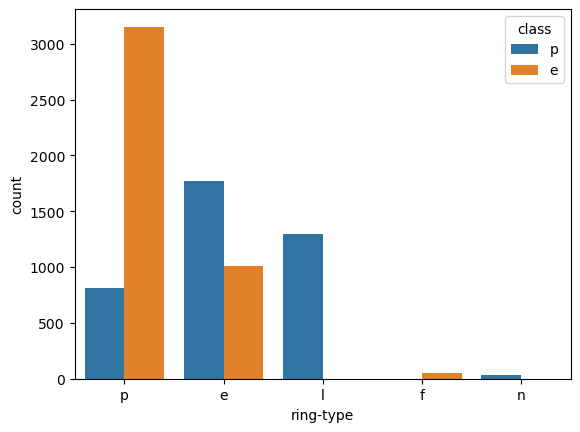

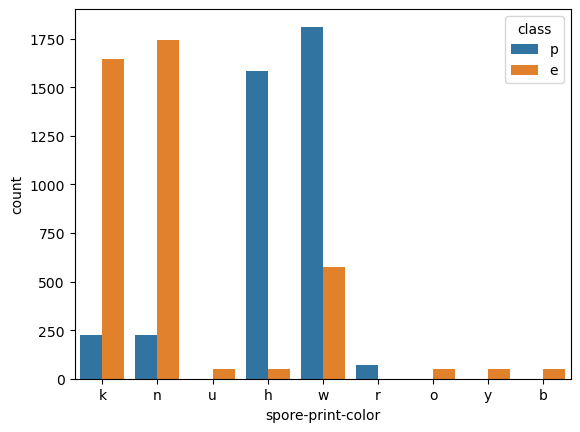

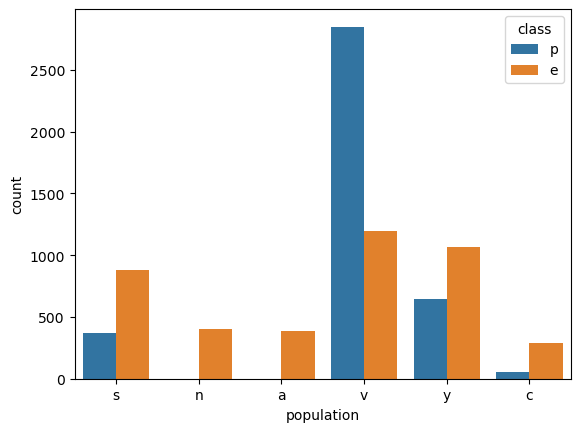

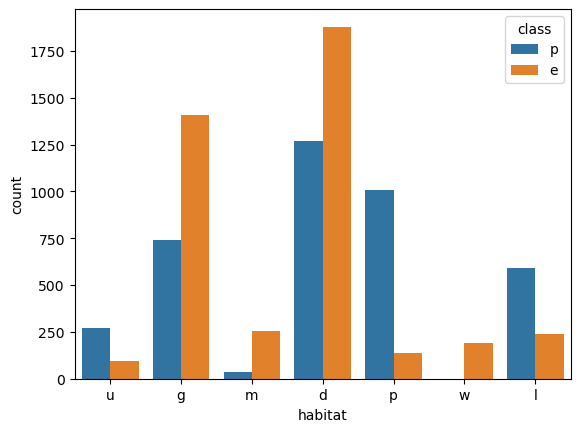

In [82]:
hue = data['class']
data_to_plot = data.drop('class', axis=1)
plot_data(hue, data_to_plot)

## 3. Data Preprocessing

In the data preprocessing section of the project, several steps we are taken to prepare the mushroom dataset for logistic regression analysis. First, the dataset was loaded into Python for processing. The primary focus was to ensure that the data was ‘tidy’ and formatted correctly for analysis. This involved converting categorical variables into a suitable numeric format with labelEncoder(), as logistic regression, work better with numerical input.

In this transformation, each category within the variable was assigned a unique numeric identifier (0/1). This step is important to obtain the categorical information in a form that the logistic regression model can use effectively. In addition, the data set was checked for missing values.

In [83]:
#Let us check if there is any null values
for col in data.columns:
    print(f"{col}: {data[col].isnull().sum()}") #no n/a values

class: 0
cap-shape: 0
cap-surface: 0
cap-color: 0
bruises: 0
odor: 0
gill-attachment: 0
gill-spacing: 0
gill-size: 0
gill-color: 0
stalk-shape: 0
stalk-root: 0
stalk-surface-above-ring: 0
stalk-surface-below-ring: 0
stalk-color-above-ring: 0
stalk-color-below-ring: 0
veil-type: 0
veil-color: 0
ring-number: 0
ring-type: 0
spore-print-color: 0
population: 0
habitat: 0


In [84]:
data['class'].unique()

array(['p', 'e'], dtype=object)

Thus we have two claasification. Either the mushroom is **poisonous ('p')** or **edible ('e')**.

In [85]:
data.shape #Find shape or our dataset(number of rows, columns)

(8124, 23)

In [12]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 8124
Number of Columns 23


Thus we have 22 features(1st one is label) and 8124 instances. Now let us check which features constitutes maximum information.

In [13]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


We can see that the dataset has values in strings. We need to convert all the unique values to integers. Thus we perform label encoding on the data.
Hence, label encoding will turn a categorical feature into numerical. 

In [14]:
# Import LabelEncoder from scikit-learn
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
le = LabelEncoder()

# Use LabelEncoder to transform the 'class' column to numerical values
data['class'] = le.fit_transform(data['class'])

data.head() # 1 = true and 0 = false

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [15]:
# Perform one-hot encoding on the categorical columns in the 'data' DataFrame
encoded_data = pd.get_dummies(data, dtype=int)  # Specify dtype=int to use 0s and 1s

# Display the first few rows of the encoded DataFrame
encoded_data.head()

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


### Let's look at the correlation between the variables

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
class,1.00,-0.18,0.02,0.02,0.16,-0.06,-0.03,-0.20,0.02,0.10,0.09,0.07,-0.03,0.10,-0.05,-0.04,0.03,-0.04,-0.04,-0.13,0.11,0.50,-0.50,-0.22,0.16,0.62,-0.22,0.07,-0.79,0.19,0.29,0.29,-0.13,0.13,0.35,-0.35,-0.54,0.54,0.54,-0.11,0.12,0.15,-0.15,-0.29,-0.09,-0.05,0.06,-0.20,-0.23,-0.05,0.10,-0.10,0.30,0.02,-0.22,-0.20,-0.15,-0.12,0.59,-0.49,-0.02,-0.14,0.57,-0.43,-0.08,0.25,0.07,-0.11,-0.27,0.23,-0.15,0.23,-0.22,0.03,0.25,0.07,-0.11,-0.27,0.20,-0.15,0.23,-0.21,0.06,nan,-0.11,-0.11,0.14,0.03,0.07,0.18,-0.20,0.22,-0.07,0.45,0.07,-0.54,-0.07,0.49,-0.40,-0.42,-0.07,0.10,-0.07,0.36,-0.07,-0.21,-0.14,-0.22,-0.16,0.44,-0.11,-0.13,-0.17,0.16,-0.14,0.32,0.11,-0.15
cap-shape_b,-0.18,1.00,-0.01,-0.19,-0.08,-0.02,-0.22,-0.09,0.02,0.12,-0.03,0.01,-0.02,-0.12,-0.07,-0.08,0.02,-0.01,-0.01,0.21,0.12,-0.12,0.12,0.26,-0.04,-0.15,0.26,-0.02,-0.00,-0.04,-0.07,-0.07,0.12,-0.12,-0.04,0.04,0.15,-0.15,-0.13,-0.03,0.12,-0.08,0.10,0.03,0.08,-0.07,0.11,-0.06,0.08,0.06,0.28,-0.28,0.02,-0.18,0.48,-0.10,-0.04,-0.07,-0.09,0.11,0.05,-0.07,-0.10,0.13,-0.01,-0.06,-0.02,-0.03,-0.07,-0.05,0.13,-0.13,0.16,0.03,-0.06,-0.02,-0.03,-0.07,-0.05,0.13,-0.13,0.16,0.05,nan,0.09,0.09,-0.13,0.03,-0.02,-0.20,0.21,-0.16,-0.02,-0.11,-0.02,0.24,0.07,-0.12,0.03,0.04,0.07,0.18,-0.02,-0.02,0.07,-0.05,0.02,0.38,0.16,-0.17,-0.12,-0.18,0.15,0.01,0.37,-0.10,-0.05,-0.04
cap-shape_c,0.02,-0.01,1.00,-0.02,-0.01,-0.00,-0.02,-0.01,0.25,-0.02,0.02,-0.00,-0.00,-0.01,-0.01,-0.01,-0.00,-0.00,-0.00,0.02,0.02,-0.00,0.00,-0.01,-0.00,-0.01,-0.01,-0.00,0.03,-0.00,-0.01,-0.01,-0.00,0.00,-0.05,0.05,-0.03,0.03,-0.01,-0.00,-0.01,-0.01,-0.01,-0.01,-0.00,-0.01,-0.00,-0.01,0.04,0.05,0.03,-0.03,-0.01,0.00,0.04,-0.01,-0.00,-0.01,-0.01,-0.01,0.20,-0.01,-0.01,-0.00,0.06,-0.01,-0.00,-0.00,-0.01,-0.01,-0.00,-0.01,-0.00,0.35,-0.01,-0.00,-0.00,-0.01,-0.01,-0.00,-0.01,-0.00,0.20,nan,-0.00,-0.00,-0.07,0.35,-0.00,0.01,-0.01,0.01,-0.00,-0.01,-0.00,0.00,-0.00,-0.01,-0.01,-0.01,-0.00,-0.00,-0.00,0.03,-0.00,-0.00,0.11,-0.01,-0.01,-0.02,-0.01,-0.02,-0.01,0.07,-0.00,-0.01,-0.00,-0.00
cap-shape_f,0.02,-0.19,-0.02,1.00,-0.27,-0.05,-0.72,0.06,-0.01,-0.09,0.03,0.02,-0.00,0.01,0.06,0.02,-0.05,0.01,0.01,-0.09,-0.01,-0.05,0.05,-0.10,

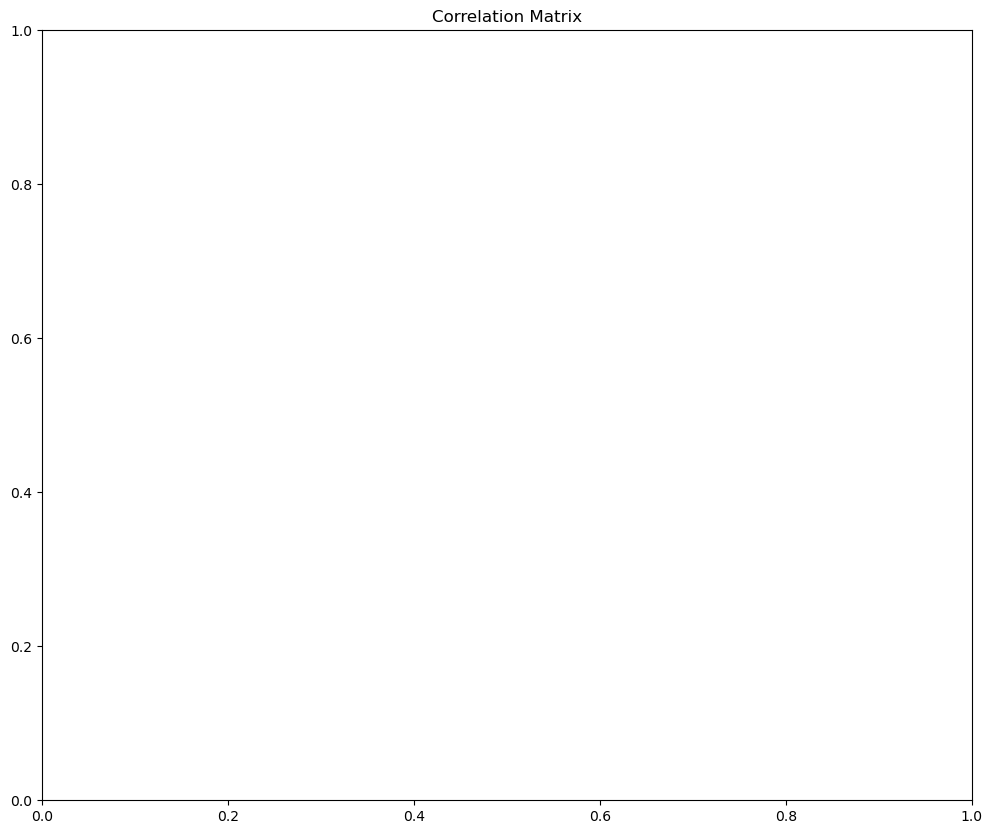

In [16]:
import matplotlib.pyplot as plt

corr = encoded_data.corr()

# Adjust figure size
plt.figure(figsize=(12, 10))

# Add title
plt.title('Correlation Matrix')

# Format the correlation matrix with a specific precision using apply
corr_formatted = corr.apply(lambda x: x.map('{:.2f}'.format))

# Create heatmap with coolwarm background gradient and numeric annotations
corr_heatmap = corr_formatted.style.background_gradient('coolwarm')

# Display the heatmap
corr_heatmap

## 4. Training Model
Strore Feature Matrix in X and Response(Target) in Vector y

We will be performing a simple machine learning procedure, so the next step will be to randomly split the dataset into an 80% / 20% ratio for training and testing, respectively

In [86]:
# Extract the target variable 'class' and reshape it into a 2D array
y = data['class'].values.reshape(-1, 1)

# Extract features from the encoded dataset, excluding the target variable 'class'
X = encoded_data.drop(['class'], axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
y_train

array([[1],
       [1],
       [1],
       ...,
       [0],
       [1],
       [0]])

### Logistic regression

In [68]:
# Import LogisticRegression from scikit-learn's linear_model module
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score  # cross-validation
from sklearn.metrics import roc_curve, auc, confusion_matrix  # Evaluation metrics for classification models

In [67]:
# Create an instance of Logistic Regression model
logistic_reg = LogisticRegression()

# Train the Logistic Regression model on the training data
logistic_reg.fit(X_train, y_train.ravel())

LogisticRegression()

In [69]:
# Predict probabilities and class labels on the test data
y_prob = logistic_reg.predict_proba(X_test)[:, 1]
y_pred = np.where(y_prob > 0.5, 1, 0)

the code is using the logistic regression model to predict probabilities (y_prob) for the positive class (class 1) on the test set. Then, it converts these probabilities into binary predictions (y_pred) by applying a threshold of 0.5. If the predicted probability is greater than 0.5, the corresponding prediction is 1; otherwise, it is 0.

In [70]:
# Compute the confusion matrix based on predicted and true class labels
log_confusion_matrix = confusion_matrix(y_test, y_pred)

log_confusion_matrix

array([[843,   0],
       [  0, 782]])

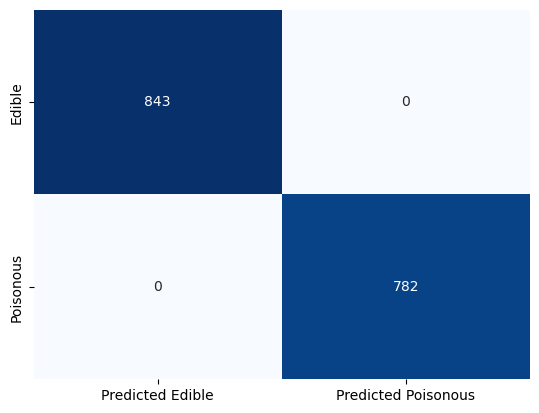

In [71]:
# Visualising Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='d', cbar=False, yticklabels=['Edible', 'Poisonous'],
            xticklabels=['Predicted Edible', 'Predicted Poisonous'])
plt.show()

- The first row indicates the **true negatives (TN)** and **false positives (FP)**
- The second row indicates **false negatives (FN)** and **true positives (TP)**

In this specific case, it appears that the model made correct predictions for all instances in both classes, resulting in a confusion matrix with zeros in the off-diagonal elements. This suggests a high level of accuracy in the model's predictions on the test set.

In [72]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

"1.0" is the value of the Area Under the Curve (AUC) for the Receiver Operating Characteristic (ROC) curve, it indicates a perfect classifier. In ROC AUC, a value of 1.0 means that the model has achieved a perfect separation between positive and negative instances. 

In [64]:
from sklearn.metrics import accuracy_score
print("ACC LR", accuracy_score(y_test,y_pred))

ACC LR 1.0


In [51]:
def plot_roc(roc_auc):
    plt.figure(figsize=(5,5))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color='red', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.axis('tight')
    plt.ylabel('True positive rate')
    plt.xlabel('False positive rate')

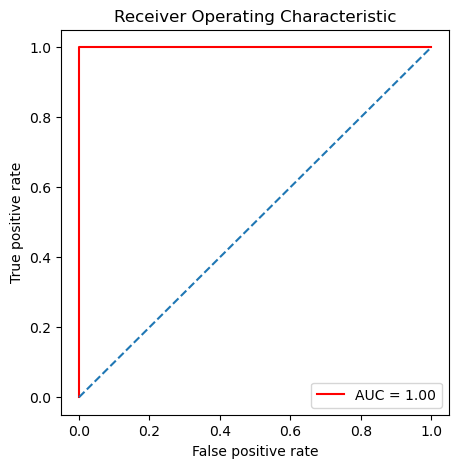

In [52]:
plot_roc(roc_auc) #perfect classification

Example of a ROC curve. The straight line is a base model

In [76]:
lr = LogisticRegression(solver="lbfgs", max_iter=500)
lr.fit(X_train, y_train)

print("Test Accuracy: {}%".format(round(lr.score(X_test, y_test)*100,2)))

Test Accuracy: 100.0%


/Users/moritzrichter/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Linear Discriminant Analysis (LDA)

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [40]:
# Create an instance of Linear Discriminant Analysis (LDA) model
lda = LinearDiscriminantAnalysis()

# Train the LDA model on the training data
lda.fit(X_train, y_train.ravel())

# Predict probabilities and class labels on the test data using LDA
y_prob_lda = lda.predict_proba(X_test)[:, 1]
y_pred_lda = np.where(y_prob_lda > 0.5, 1, 0)

In [30]:
lda_confusion_matrix = confusion_matrix(y_test, y_pred_lda)
lda_confusion_matrix

array([[843,   0],
       [  0, 782]])

In [55]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob_lda)
roc_auc_lda = auc(false_positive_rate, true_positive_rate)
roc_auc_lda

1.0

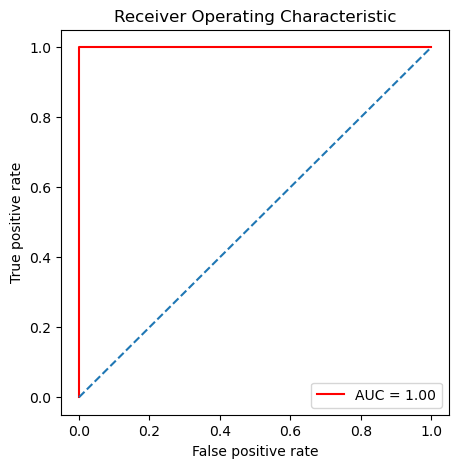

In [32]:
plot_roc(roc_auc_lda)

### Quadratic Discriminant Analysis (QDA)

In [33]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [34]:
qda = QuadraticDiscriminantAnalysis()

qda.fit(X_train, y_train.ravel())

y_prob_qda = qda.predict_proba(X_test)[:,1]
y_pred_qda = np.where(y_prob_qda > 0.5, 1, 0)

/Users/moritzrichter/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [35]:
qda_confusion_matrix = confusion_matrix(y_test, y_pred_qda)
qda_confusion_matrix

array([[843,   0],
       [  0, 782]])

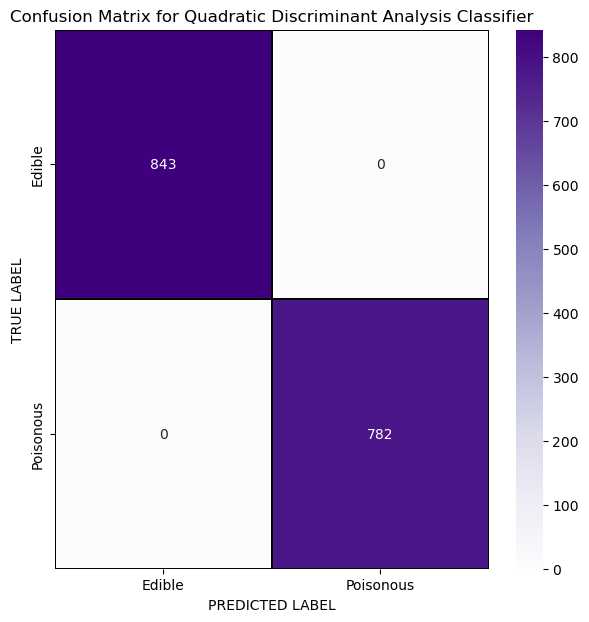

In [54]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_qda)

# Define labels for the confusion matrix
class_labels = ["Edible", "Poisonous"]

# Plotting the confusion matrix heatmap
f, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(cm, annot=True, linewidths=0.2, linecolor="black", fmt=".0f", ax=ax, cmap="Purples", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Quadratic Discriminant Analysis Classifier')
plt.show()

In [87]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob_qda)
roc_auc_qda = auc(false_positive_rate, true_positive_rate)
roc_auc_qda

ValueError: y_true takes value in {'e', 'p'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

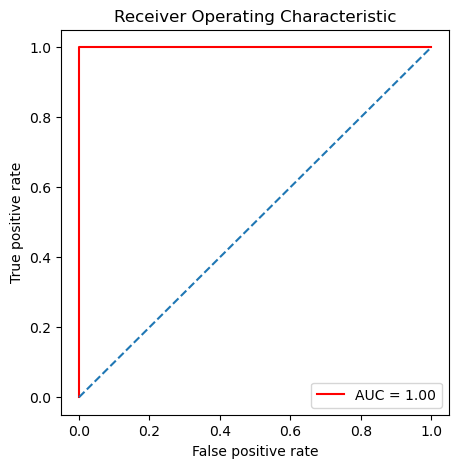

In [37]:
plot_roc(roc_auc_qda)